<a href="https://colab.research.google.com/github/s1c5000/kaggle/blob/main/pima-indians-diabetes/2_EDA_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## EDA

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning 이 일어나지 않도록 
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
!kaggle datasets download -d uciml/pima-indians-diabetes-database

  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 16.6MB/s]


In [ ]:
!unzip '/content/pima-indians-diabetes-database.zip'

Archive:  /content/pima-indians-diabetes-database.zip
  inflating: diabetes.csv            


In [ ]:
df = pd.read_csv('/content/diabetes.csv')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# 정보 보기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
#결측치 보기 Ture False로 나온다
df.isnull().head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [ ]:
# 수치데이터에 대한 요약을 본다.

df.describe()
#df.describe(include='object') # object타입을 보고싶으면 옵션을준다

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


결측치가 없는 값인 줄 알았는데     
describe를 보면 혈압등 0일 수 없는 값이 0으로 나온것 들이있다    
결측치라고 볼 수 있다

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
# 마지막 값은 label이므로 가져오지 않는다
feature_columns = df.columns[:-1].tolist()
feature_columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

### 결측치 시각화

0이 나오면 안되는 값들이 0이 섞여있다    
해당값들을 결측치라고 보고 시각화 해보겠다

In [ ]:
cols = feature_columns[1:]
cols

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [ ]:
# 결측치 여부를 나타내는 데이터프레임을 만든다
df_null = df[cols].replace(0,np.nan) # 0값을 np.nan으로 만든다
df_null

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148.0,72.0,35.0,NaN,33.6,0.627,50
1,85.0,66.0,29.0,NaN,26.6,0.351,31
2,183.0,64.0,NaN,NaN,23.3,0.672,32
3,89.0,66.0,23.0,94.0,28.1,0.167,21
4,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9,0.171,63
764,122.0,70.0,27.0,NaN,36.8,0.340,27
765,121.0,72.0,23.0,112.0,26.2,0.245,30
766,126.0,60.0,NaN,NaN,30.1,0.349,47


In [ ]:
df_null = df_null.isnull()
df_null

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,False,False,False,True,False,False,False
1,False,False,False,True,False,False,False
2,False,False,True,True,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False
764,False,False,False,True,False,False,False
765,False,False,False,False,False,False,False
766,False,False,True,True,False,False,False


In [ ]:
df_null.sum() # 결측치 합계

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

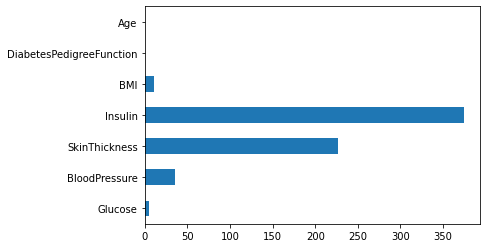

In [ ]:
df_null.sum().plot.barh()# 결측치를 그래프로 시각화      datafame으로 만들어야지 plot 사용가능

In [ ]:
df_null.mean() * 100 # 결측치 비율을 구할 수 있다.

Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
dtype: float64

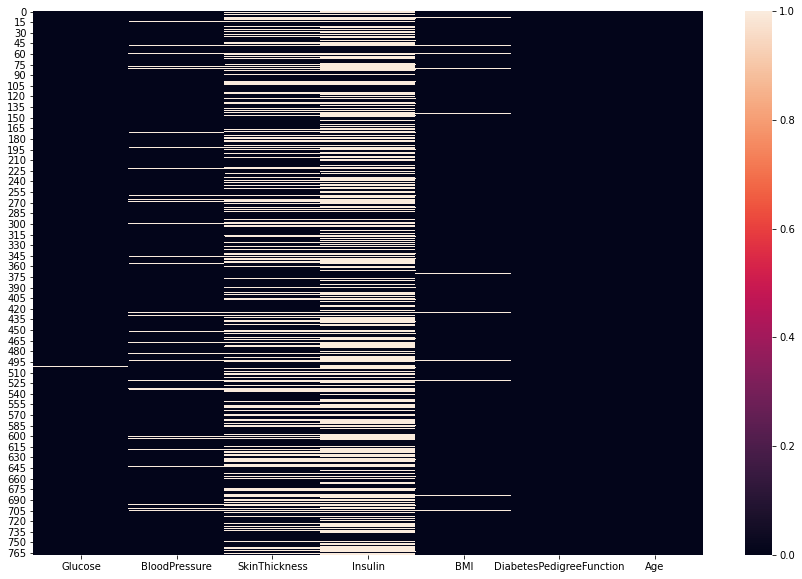

In [ ]:
# 결측치를 heatmap으로 시각화
# 하얀값이 1이므로 결측치
plt.figure(figsize=(15,10))
sns.heatmap(df_null)
#sns.heatmap(df_null, cmap='Grays_') # 색 반전해서 보여줌

인슐린의 결측치가 많다    
보통 당뇨병에서 인슐린에 관한 얘기가 많은 것을 보면 중요한 역할을 할것 같은데 빠져있다

## 정답값

In [ ]:
# 정답값인 outcome의 갯수를 세어보겠다
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
# outcome 의 비율
df['Outcome'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [ ]:
#임신횟수와 정답값 비교하기
# pregnancies를 groupby로 그룹화 하여 outcome에 대한 비율
df.groupby(['Pregnancies'])['Outcome'].mean()

Pregnancies
0     0.342342
1     0.214815
2     0.184466
3     0.360000
4     0.338235
5     0.368421
6     0.320000
7     0.555556
8     0.578947
9     0.642857
10    0.416667
11    0.636364
12    0.444444
13    0.500000
14    1.000000
15    1.000000
17    1.000000
Name: Outcome, dtype: float64

임신횟수가 많아질 수록 늘어나는 추세이다

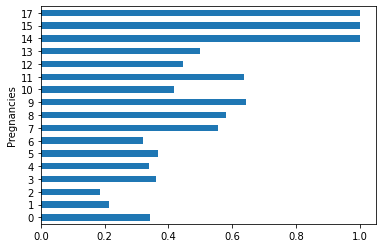

In [ ]:
df.groupby(['Pregnancies'])['Outcome'].mean().plot.barh()

하지만 임신횟수가 저렇게 많은 케이스는 별로 없다고 생각된다    
따라서 횟수도 같이 표시해 본다

In [ ]:
# agg는 aggregation(집합) 
# reset_index는 인덱스 값 부여
df_po = df.groupby(['Pregnancies'])['Outcome'].agg(['mean','count']).reset_index()
df_po

,Pregnancies,mean,count
0,0,0.342342,111
1,1,0.214815,135
2,2,0.184466,103
3,3,0.360000,75
4,4,0.338235,68
5,5,0.368421,57
6,6,0.320000,50
7,7,0.555556,45
8,8,0.578947,38
9,9,0.642857,28


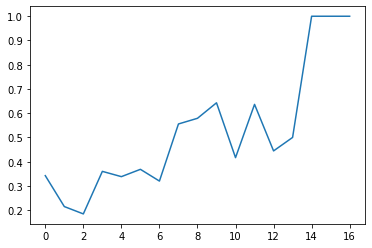

In [ ]:
#임신 횟수에 따른 당뇨병 발생 비율
df_po['mean'].plot()

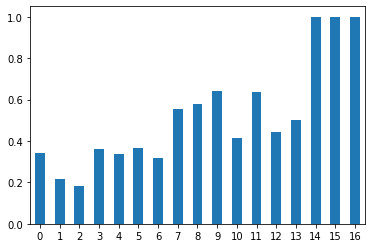

In [ ]:
df_po['mean'].plot.bar(rot=0) # x축 글씨가 누워있으면 rot으로 돌린다

## countplot

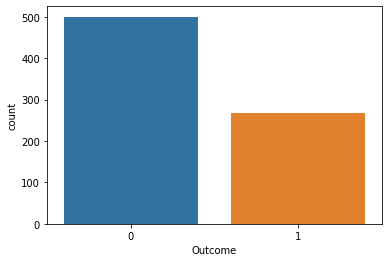

In [ ]:
# 위에서 구했던 당뇨병 발병 비율을 구해본다
# 당뇨병 발병 빈도수를 비교 한다.

sns.countplot(data=df, x='Outcome')

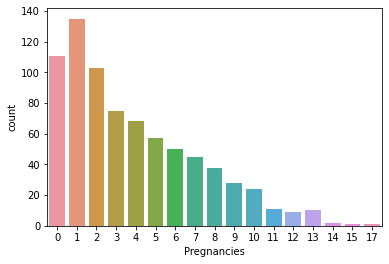

In [ ]:
# 임신횟수의 빈도수
sns.countplot(data=df, x=df['Pregnancies'])

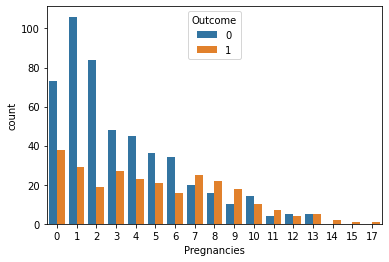

In [ ]:
# 임신 횟수에 따른 당뇨병 발병 빈도수
# hue로 지정된 feture를 고유값별로 나눠서 표시해준다
sns.countplot(data=df, x='Pregnancies', hue='Outcome')

임신횟수가 많아질 수록 당뇨병 비율이 늘어나는 모습을 보인다

In [ ]:
# 임신횟수가 많고 적음에 따라 Pregnancies_high변수를 만든다
df['Pregnancies_high'] = df['Pregnancies'] > 6 #번 초과하는 값들은 Pregnancies_high에서 True로 표시될 것이다.
df[['Pregnancies', 'Pregnancies_high']].head()

,Pregnancies,Pregnancies_high
0,6,False
1,1,False
2,8,True
3,1,False
4,0,False


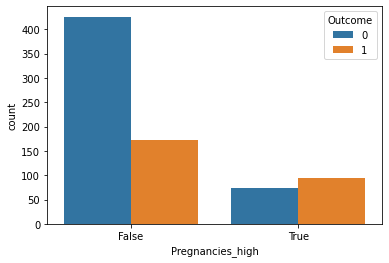

In [ ]:
#Pregnancies_high 변수의 빈도수를 countplot으로하고 outcome값에 따라 다른 색상으로 표현
sns.countplot(data=df, x='Pregnancies_high',hue='Outcome')

임신 횟수가 적은 사람들은 당뇨비율이 적지만 임신횟수가 많다면 당뇨비율이 많다

## barplot

기본설정으로 시각화하면 y축에는 평균을 추정해서 그리게 된다

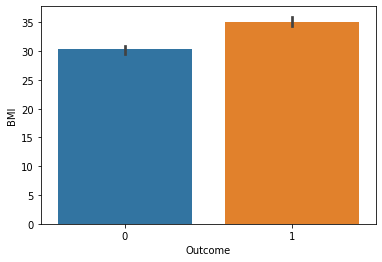

In [ ]:
#당뇨병 발병에 따른 BMI 수치를 비교
# y축은 평균값들이다.
# 검정막대는 95(default)% 신뢰구간이다.
sns.barplot(data=df, x='Outcome', y= 'BMI')

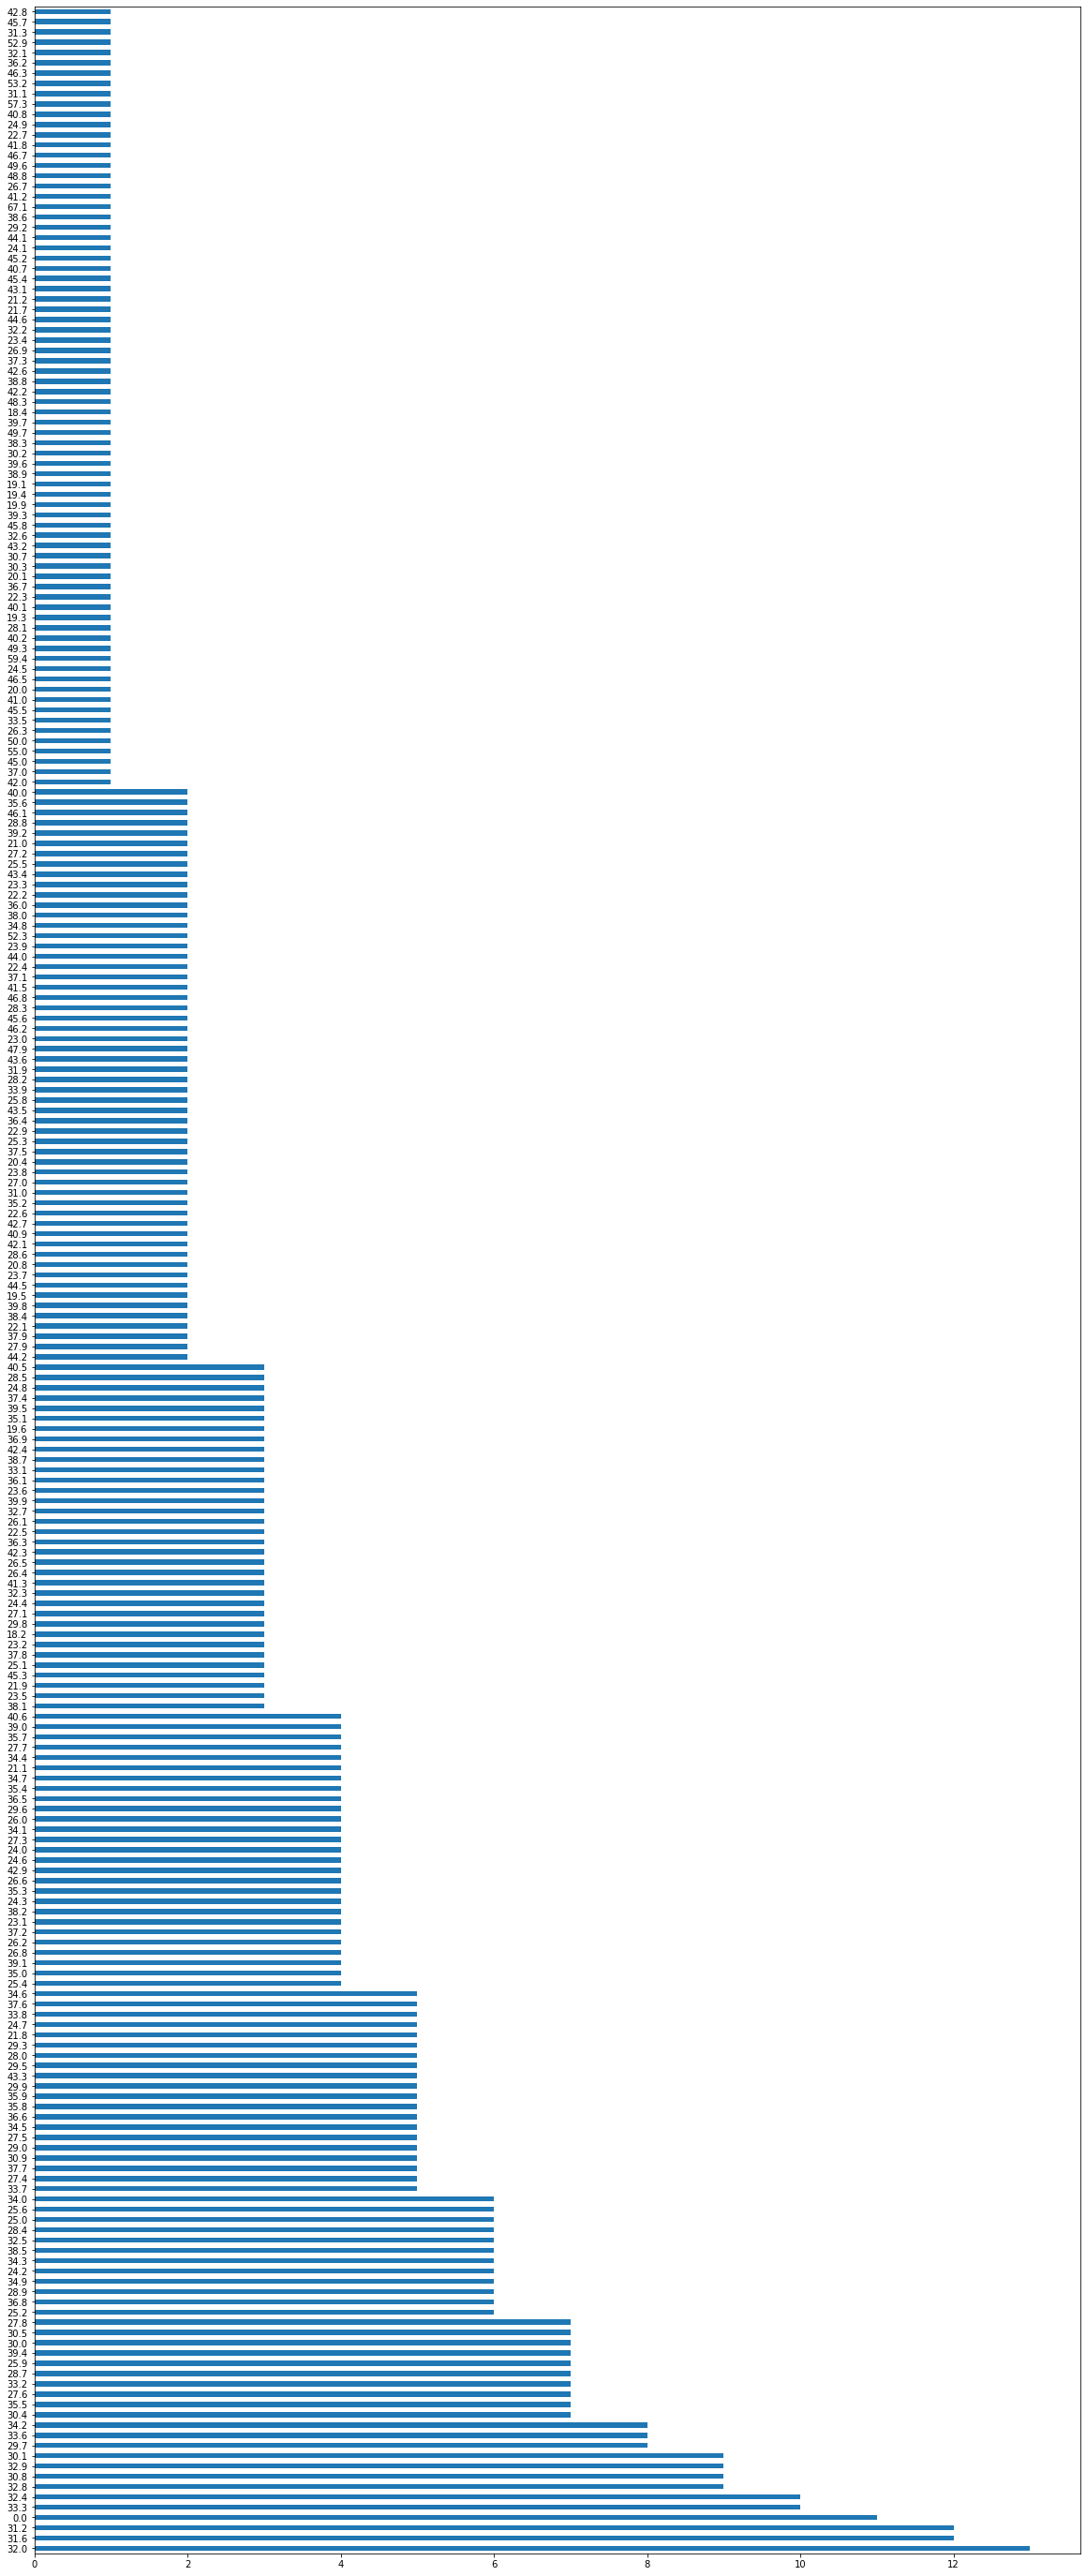

In [ ]:
# barplot에서 y 값으로 들어가게 되면 평균적인값들이 들어간다.
plt.figure(figsize=(20,50))
df['BMI'].value_counts().plot.barh()

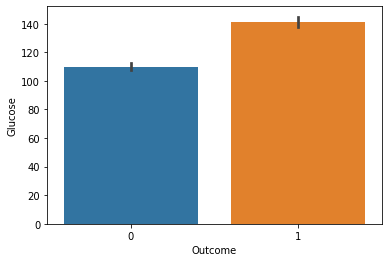

In [ ]:
#당뇨병 발병에 따른 포도당(clucose)수치를 비교
sns.barplot(data=df, x='Outcome',y='Glucose')

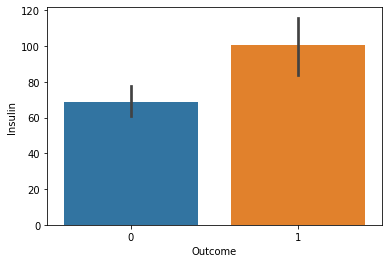

In [ ]:
#인슐린 수치가 0 이상인 관측치(결측치아닌것)에 대해서 당뇨병 발병을 비교한다.
sns.barplot(data=df, x='Outcome', y = 'Insulin')

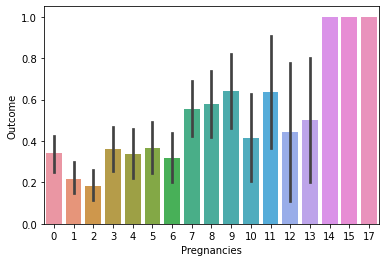

In [ ]:
# 임신횟수에 따른 발병 비율
sns.barplot(data= df, x='Pregnancies', y = 'Outcome' )

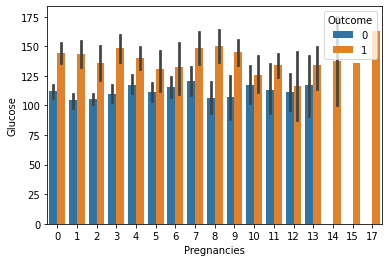

In [ ]:
# 임신횟수에 따른 포도당수치를 발병여부에 따라 시각화
# 임신을 한 횟수랑 상관없이 당뇨인 사람들은 포도당 수치가 높다
sns.barplot(data= df, x='Pregnancies', y = 'Glucose', hue='Outcome')

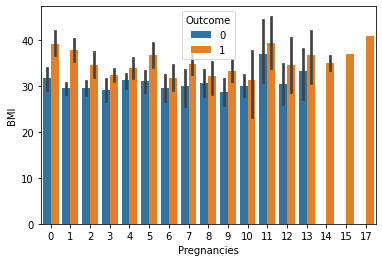

In [ ]:
# 임신횟수에 따른 BMI를 발병여부에 따라 시각화
# 임신을 한 횟수랑 상관없이 당뇨인 사람들은 BMI 수치가 높다
sns.barplot(data= df, x='Pregnancies', y = 'BMI', hue='Outcome')

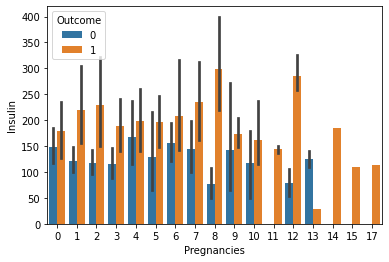

In [ ]:
# 임신횟수에 따른 인슐린수치를 발병여부에 따라 시각화
# 인슐린수치는 결측치가 많아서 0 보다 큰 값에 대해서만그린다
sns.barplot(data= df[df.Insulin > 0], x='Pregnancies', y = 'Insulin', hue='Outcome')

## boxplot

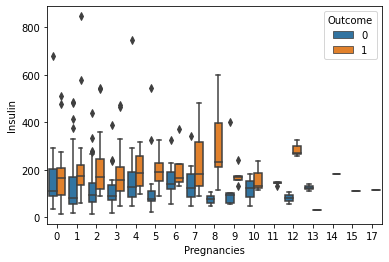

In [ ]:
## 임신횟수에 따른 인슐린수치를 발병여부에 따라 시각화
# 인슐린수치는 결측치가 많아서 0 보다 큰 값에 대해서만그린다
# 색칠된 네모의 가장아래는 1사분위값이고 위는 3사분위 값이다

sns.boxplot(data= df[df['Insulin'] > 0], x='Pregnancies', y = 'Insulin', hue='Outcome')

## violinplot

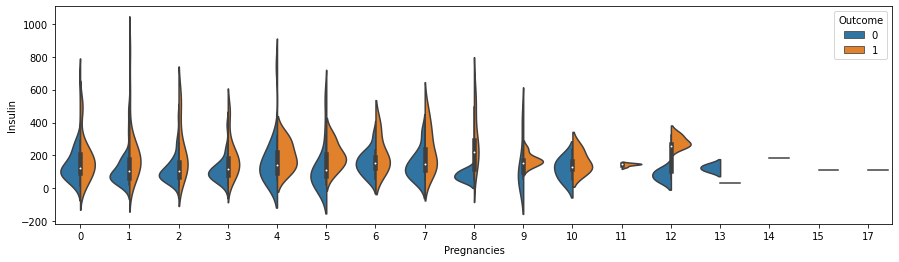

In [ ]:
# 위의 그래프를 violinplot으로 시각화한다.
# 분포를 확인하기 쉽다.
# split옵션은 hue 옵션을 넣었을때 보기 좋다

plt.figure(figsize=(15,4))
sns.violinplot(data= df[df['Insulin'] > 0], x='Pregnancies', y = 'Insulin', hue='Outcome', split=True)

## swarmplot

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 27.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 18.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


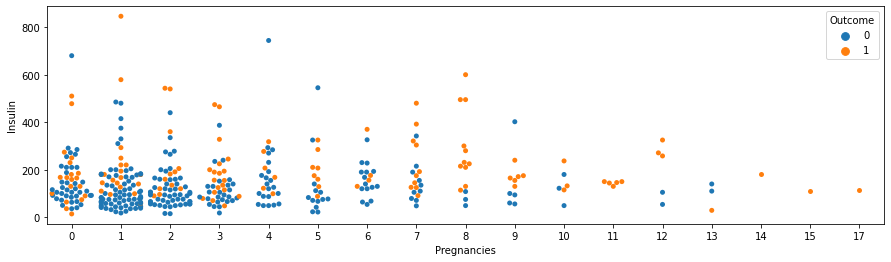

In [ ]:
# 위의 그래프를 swarmplot으로 그려보겠다
# 산포도를 보기 좋다

plt.figure(figsize=(15,4))
sns.swarmplot(data= df[df['Insulin'] > 0], x='Pregnancies', y = 'Insulin', hue='Outcome')

## distplot

연속된 수치형변수에 대해서 시각화하기 좋다

In [ ]:
df_0 = df[df['Outcome'] == 0]
df_1 = df[df['Outcome'] == 1]
df_0.shape, df_1.shape

((500, 10), (268, 10))

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

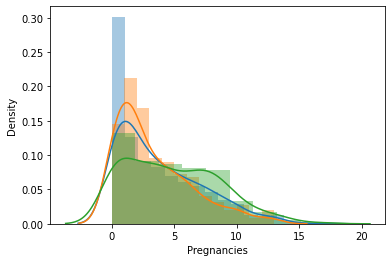

In [ ]:
# 임신횟수에 따른 당뇨병 발병 여부를 시각화한다.
# 임신횟수가 5가 넘어가면 발병횟수가 더 많아진다

sns.distplot(df['Pregnancies'],).alph=0.5
sns.distplot(df_0['Pregnancies']).alph=0.5
sns.distplot(df_1['Pregnancies']).alph=0.5

In [ ]:
df.Pregnancies.value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

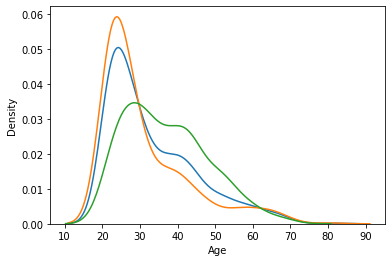

In [ ]:
# 나이에따른 당뇨병 발병 여부를 시각화

sns.distplot(df['Age'], hist=False, label='All')
sns.distplot(df_0['Age'],hist=False, label='None')
sns.distplot(df_1['Age'],hist=False, label='disease')

## subplots

pandas를 사용해서 histplot그리기     
pandas를 사용하면 모든 변수에 대한 서브플롯을 한 번에 그려준다

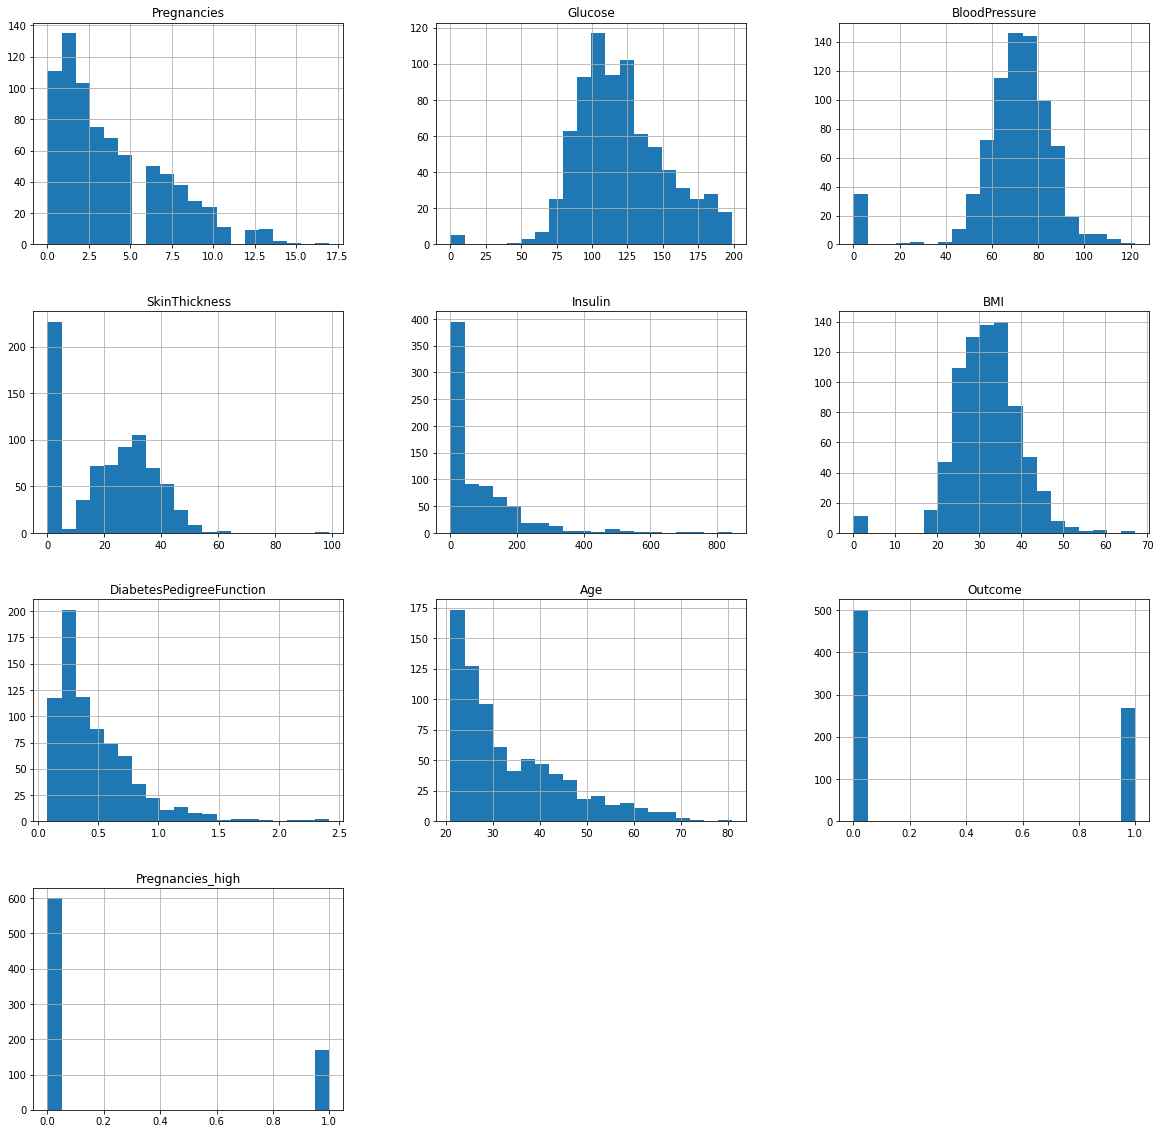

In [ ]:
# 수치형 데이터만 hist로 그릴 수 있다. 
df['Pregnancies_high'] = df['Pregnancies_high'].astype(int)
# 빈도를 bins 옵션으로 조절
h = df.hist(figsize=(20,20), bins=20)

반복문으로 서브플롯도 그릴 수 있다


In [ ]:
# 컬럼의 수 만큼 for문을 돌릴 것이다
col_num = df.columns.shape
col_num

(10,)

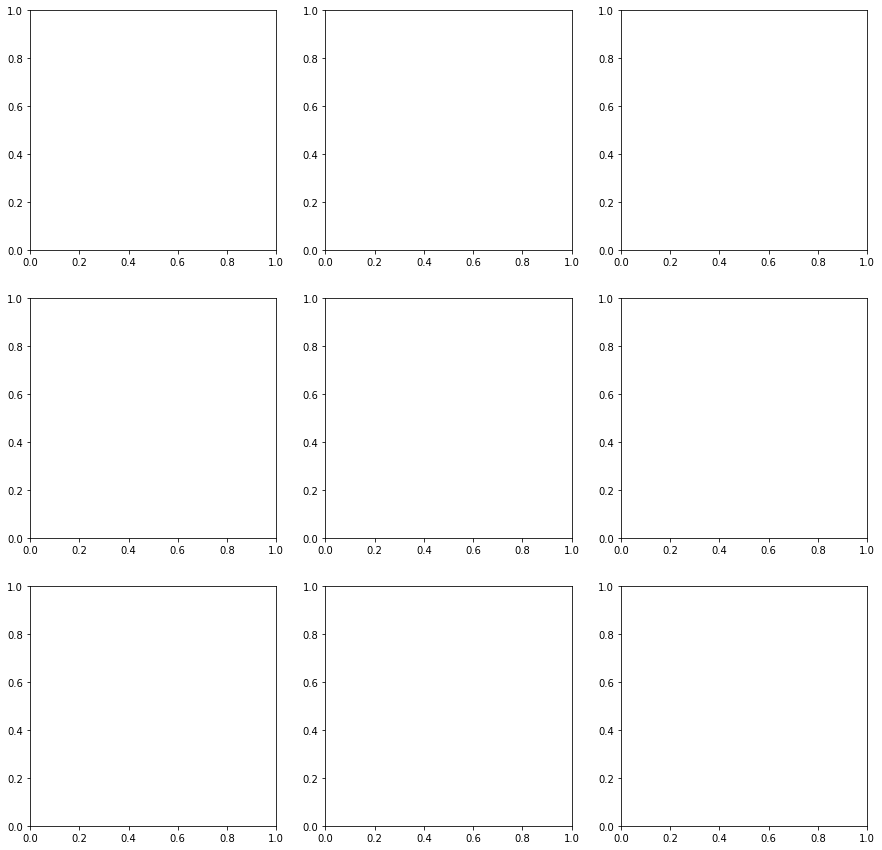

In [ ]:
# distplot ㅇ로 서브플롯을 그린다.

# nrow(행) ncols(열) 
# 첫번째인자는 도표, 두번째는 각 도표의 정보를 담은 배열
fig, axes = plt.subplots(nrows = 3, ncols= 3, figsize=(15,15))

In [ ]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9737463f60>,
      dtype=object)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


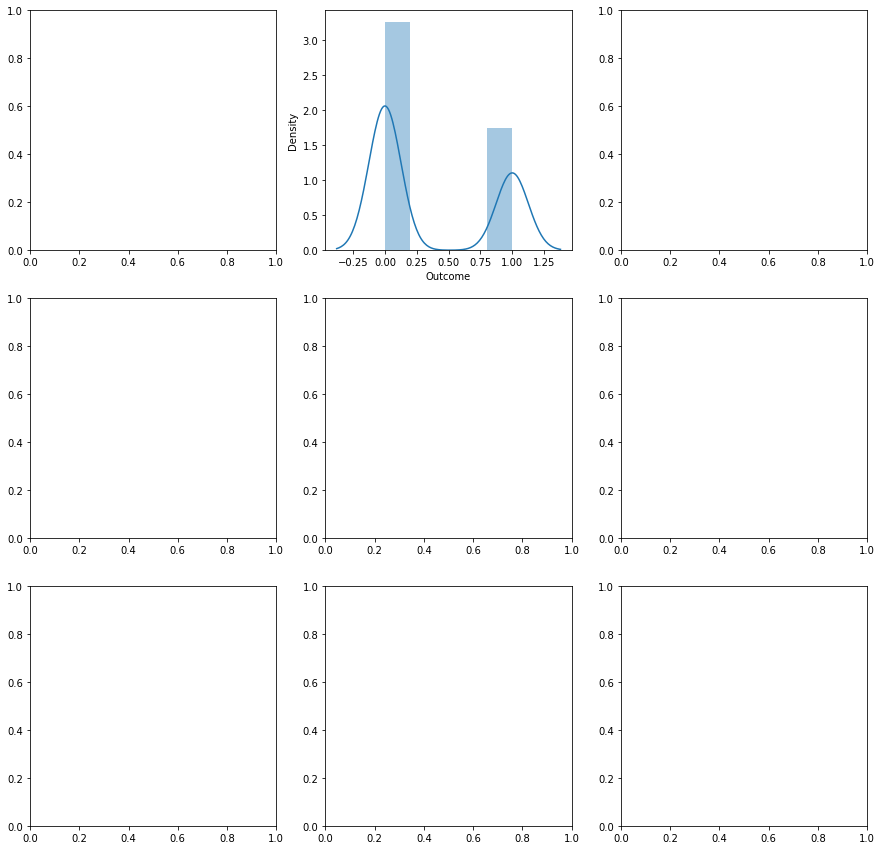

In [ ]:
fig, axes = plt.subplots(nrows = 3, ncols= 3, figsize=(15,15))

# ax로 어느 곳에 그릴지 지정가능
sns.distplot(df['Outcome'], ax=axes[0][1])

In [ ]:
cols = df.columns[:-1].tolist()
print(cols)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

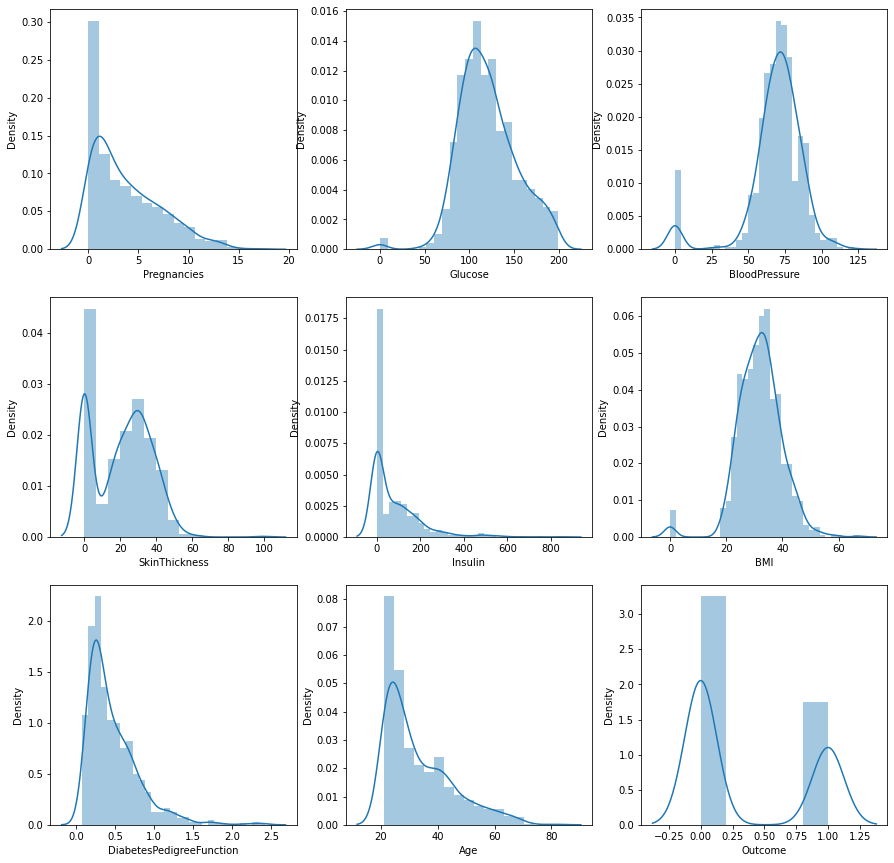

In [ ]:
# distplot으로 subplot을 그린다.
fig, axes = plt.subplots(nrows = 3, ncols= 3, figsize=(15,15))

for i, col_name in enumerate(cols):
  row = i//3
  col = i%3
  # ax로 어느 곳에 그릴지 지정가능
  sns.distplot(df[col_name], ax=axes[row][col])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

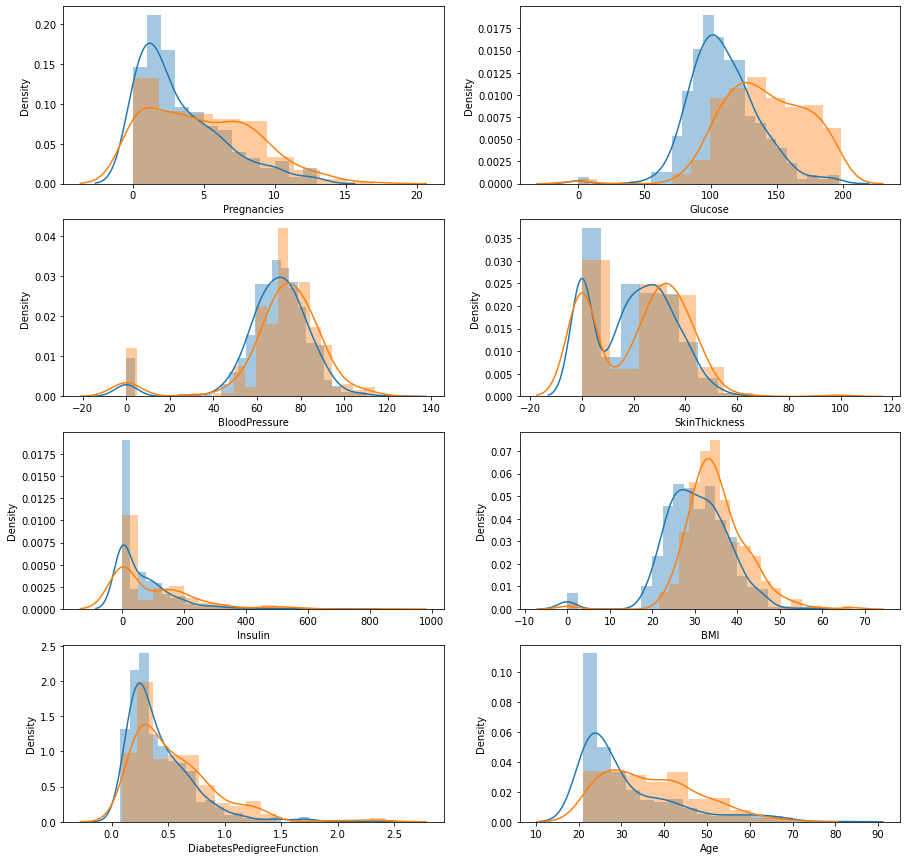

In [ ]:
# distplot으로 subplot을 그린다.
# Outcome을 기준으로 나누어서 그린다

fig, axes = plt.subplots(nrows = 4, ncols= 2, figsize=(15,15))

for i, col_name in enumerate(cols[:-1]):
  row = i//2
  col = i%2
  # ax로 어느 곳에 그릴지 지정가능
  sns.distplot(df_0[col_name], ax=axes[row][col], label=0)
  sns.distplot(df_1[col_name], ax=axes[row][col], label=1)

각 피쳐마다 특정값을 기준으로 당뇨가 아닌사람과 당뇨인 사람이 구분된다.

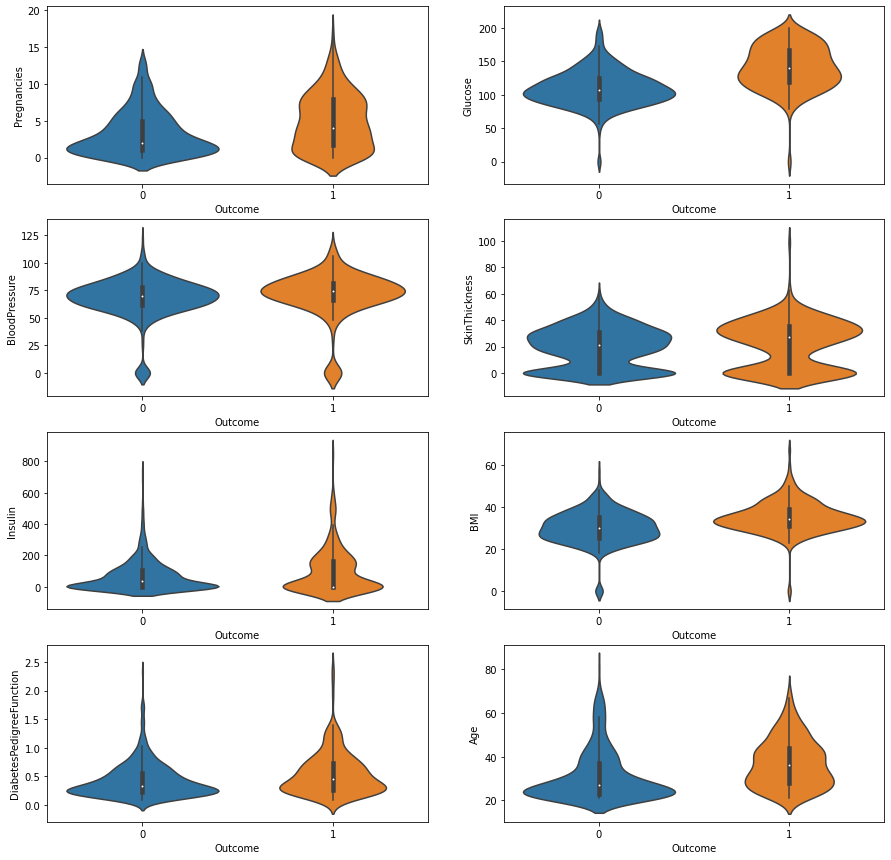

In [ ]:
# distplot으로 subplot을 그린다.
# Outcome을 기준으로 나누어서 그린다

fig, axes = plt.subplots(nrows = 4, ncols= 2, figsize=(15,15))

for i, col_name in enumerate(cols[:-1]):
  row = i//2
  col = i%2
  # ax로 어느 곳에 그릴지 지정가능
  sns.violinplot(data=df, x="Outcome", y = col_name, ax=axes[row][col] )

상관관계가 높다고 생각하는 두 변수에 대해서 시각화해보겠다

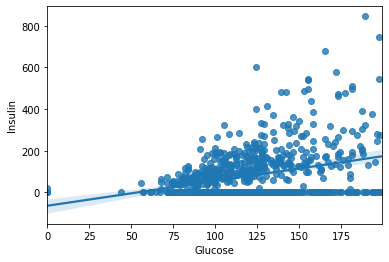

In [ ]:
# Glucose 와 Insuline의 경향을 봐보겠다

sns.regplot(data=df, x='Glucose', y = 'Insulin')

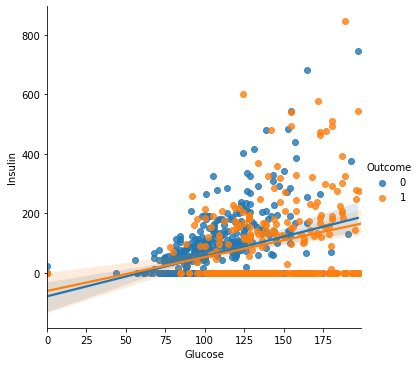

In [ ]:
# Glucose와 Insulin 수치를 Outcome에 따라 비교하고싶다
# regplot은 hue를 지원하지 않는다. 다른색으로 표현불가능


sns.lmplot(data=df, x='Glucose', y = 'Insulin', hue='Outcome')

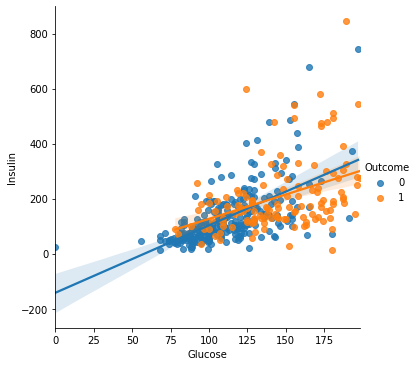

In [ ]:
# Insulin수치가 0 이상인 것들로 데이터를 그린다.
sns.lmplot(data=df[df['Insulin'] > 0], x='Glucose', y = 'Insulin', hue='Outcome')

## pairplot

모든 변수를교차해서 상관관계 보여준다

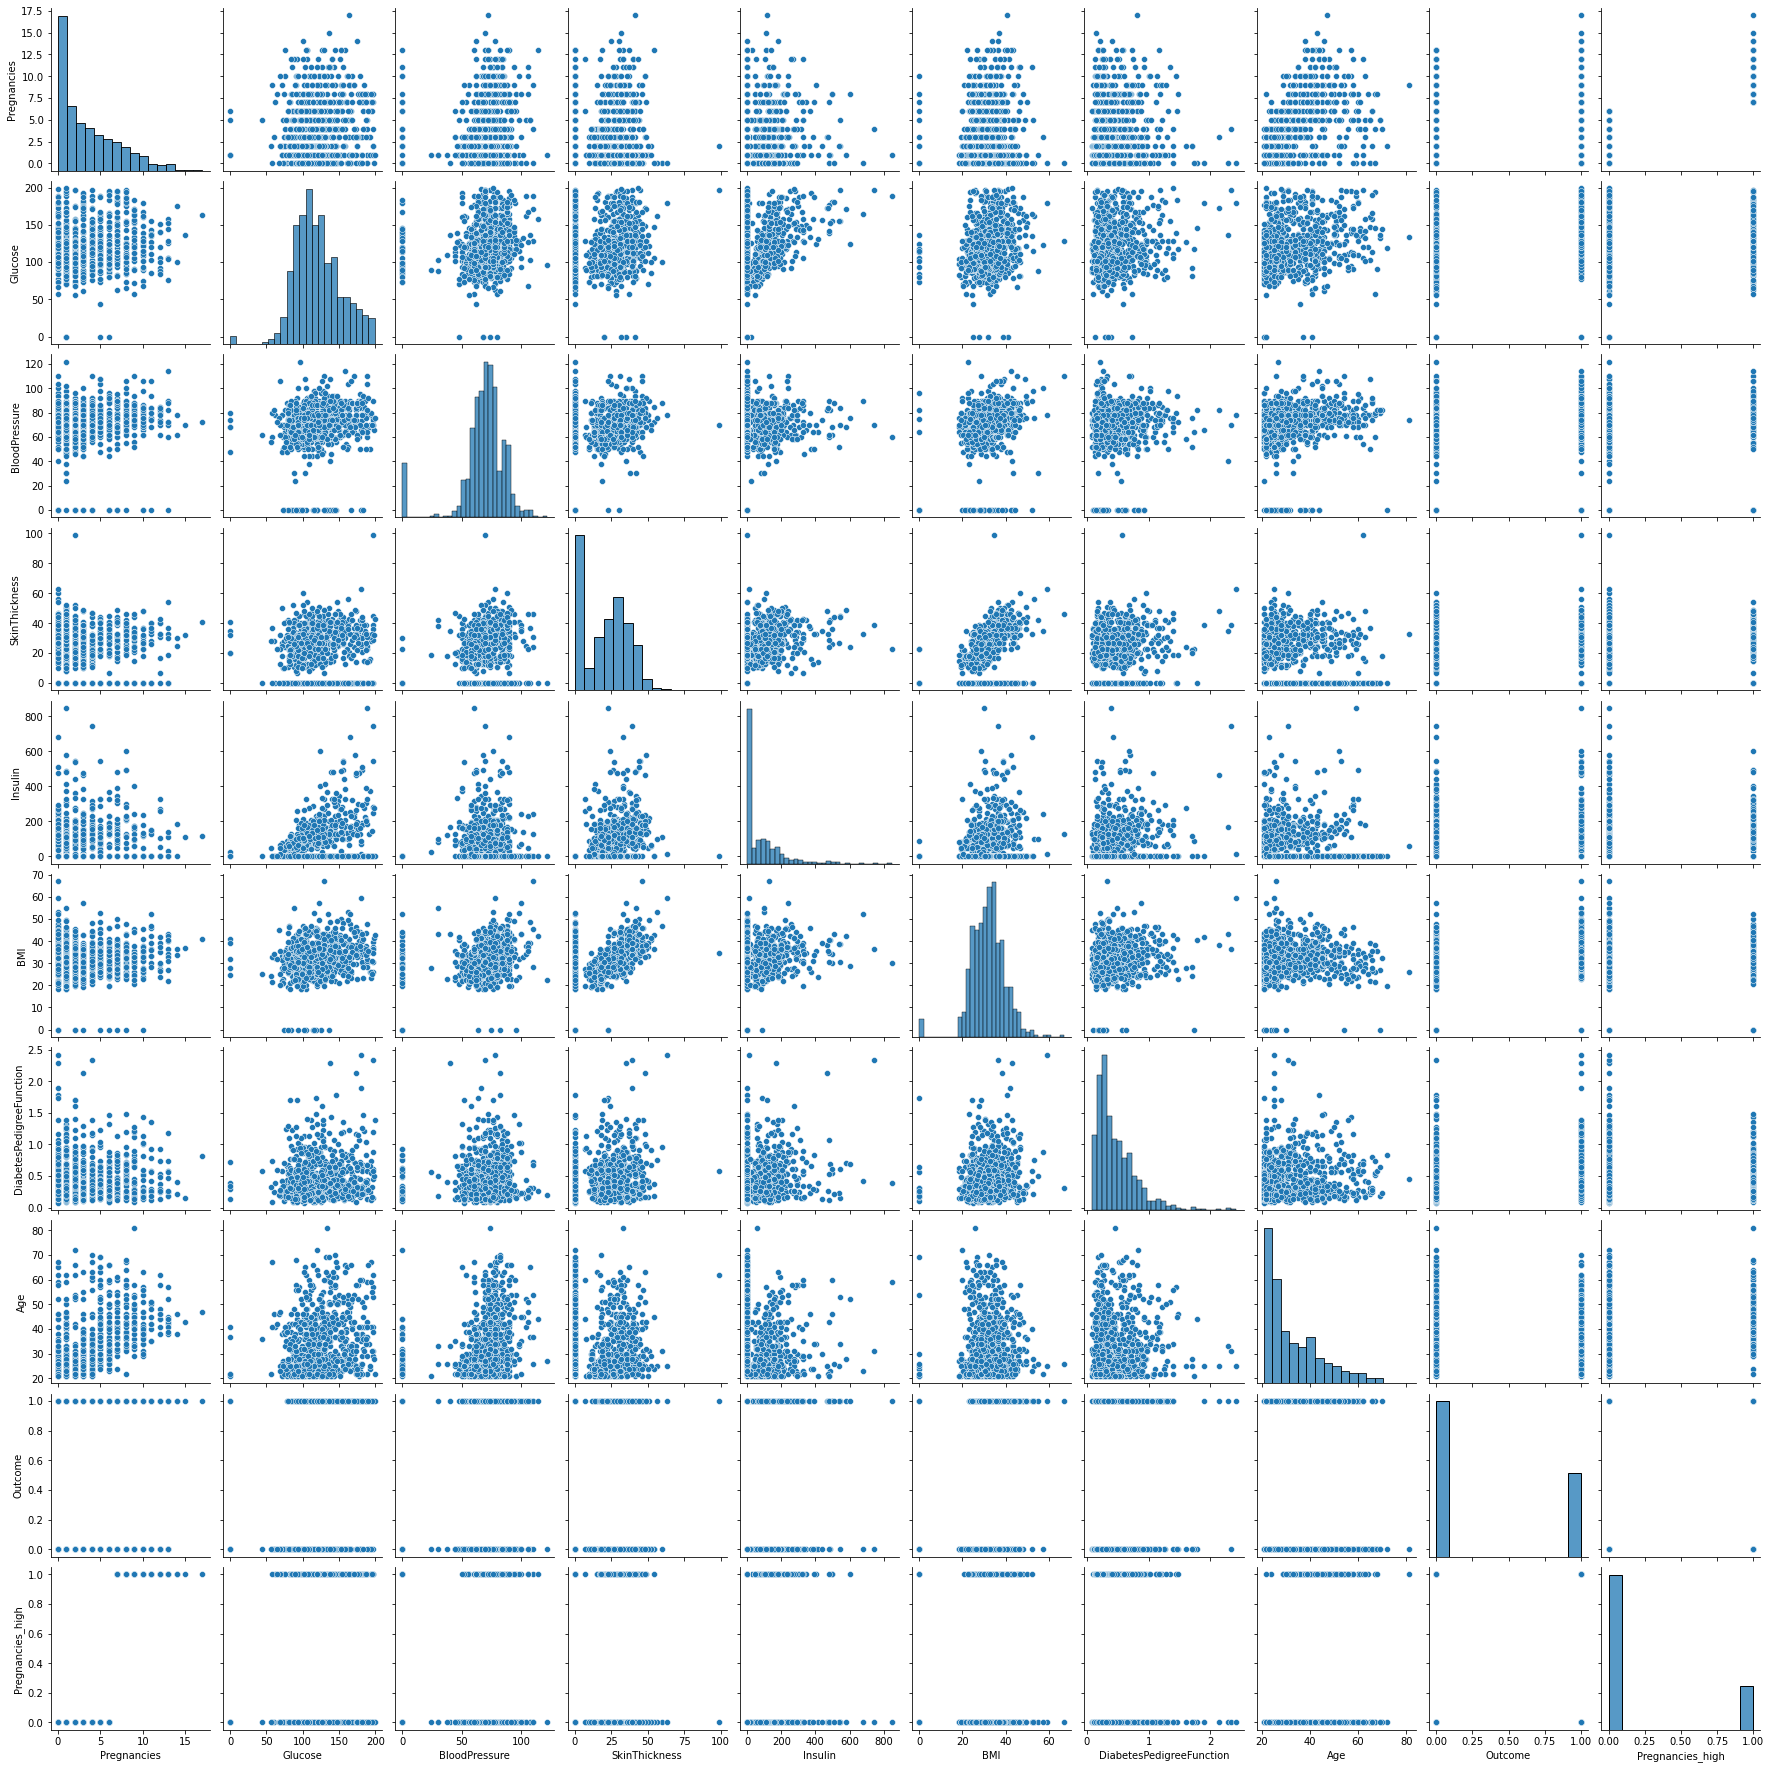

In [ ]:
sns.pairplot(df)
# 기본적으로 scatter로 표현이 되는데 바꾸고 싶다면
# sns.pairplot(df, kind='reg') 처럼 kind 옵션을 바꾼다.

## pairgrid

pairplot 과 비슷하지만 hue를 사용할 수있다.    
정답값에 대해 각 변수들의 상관관계를 보기 쉽다

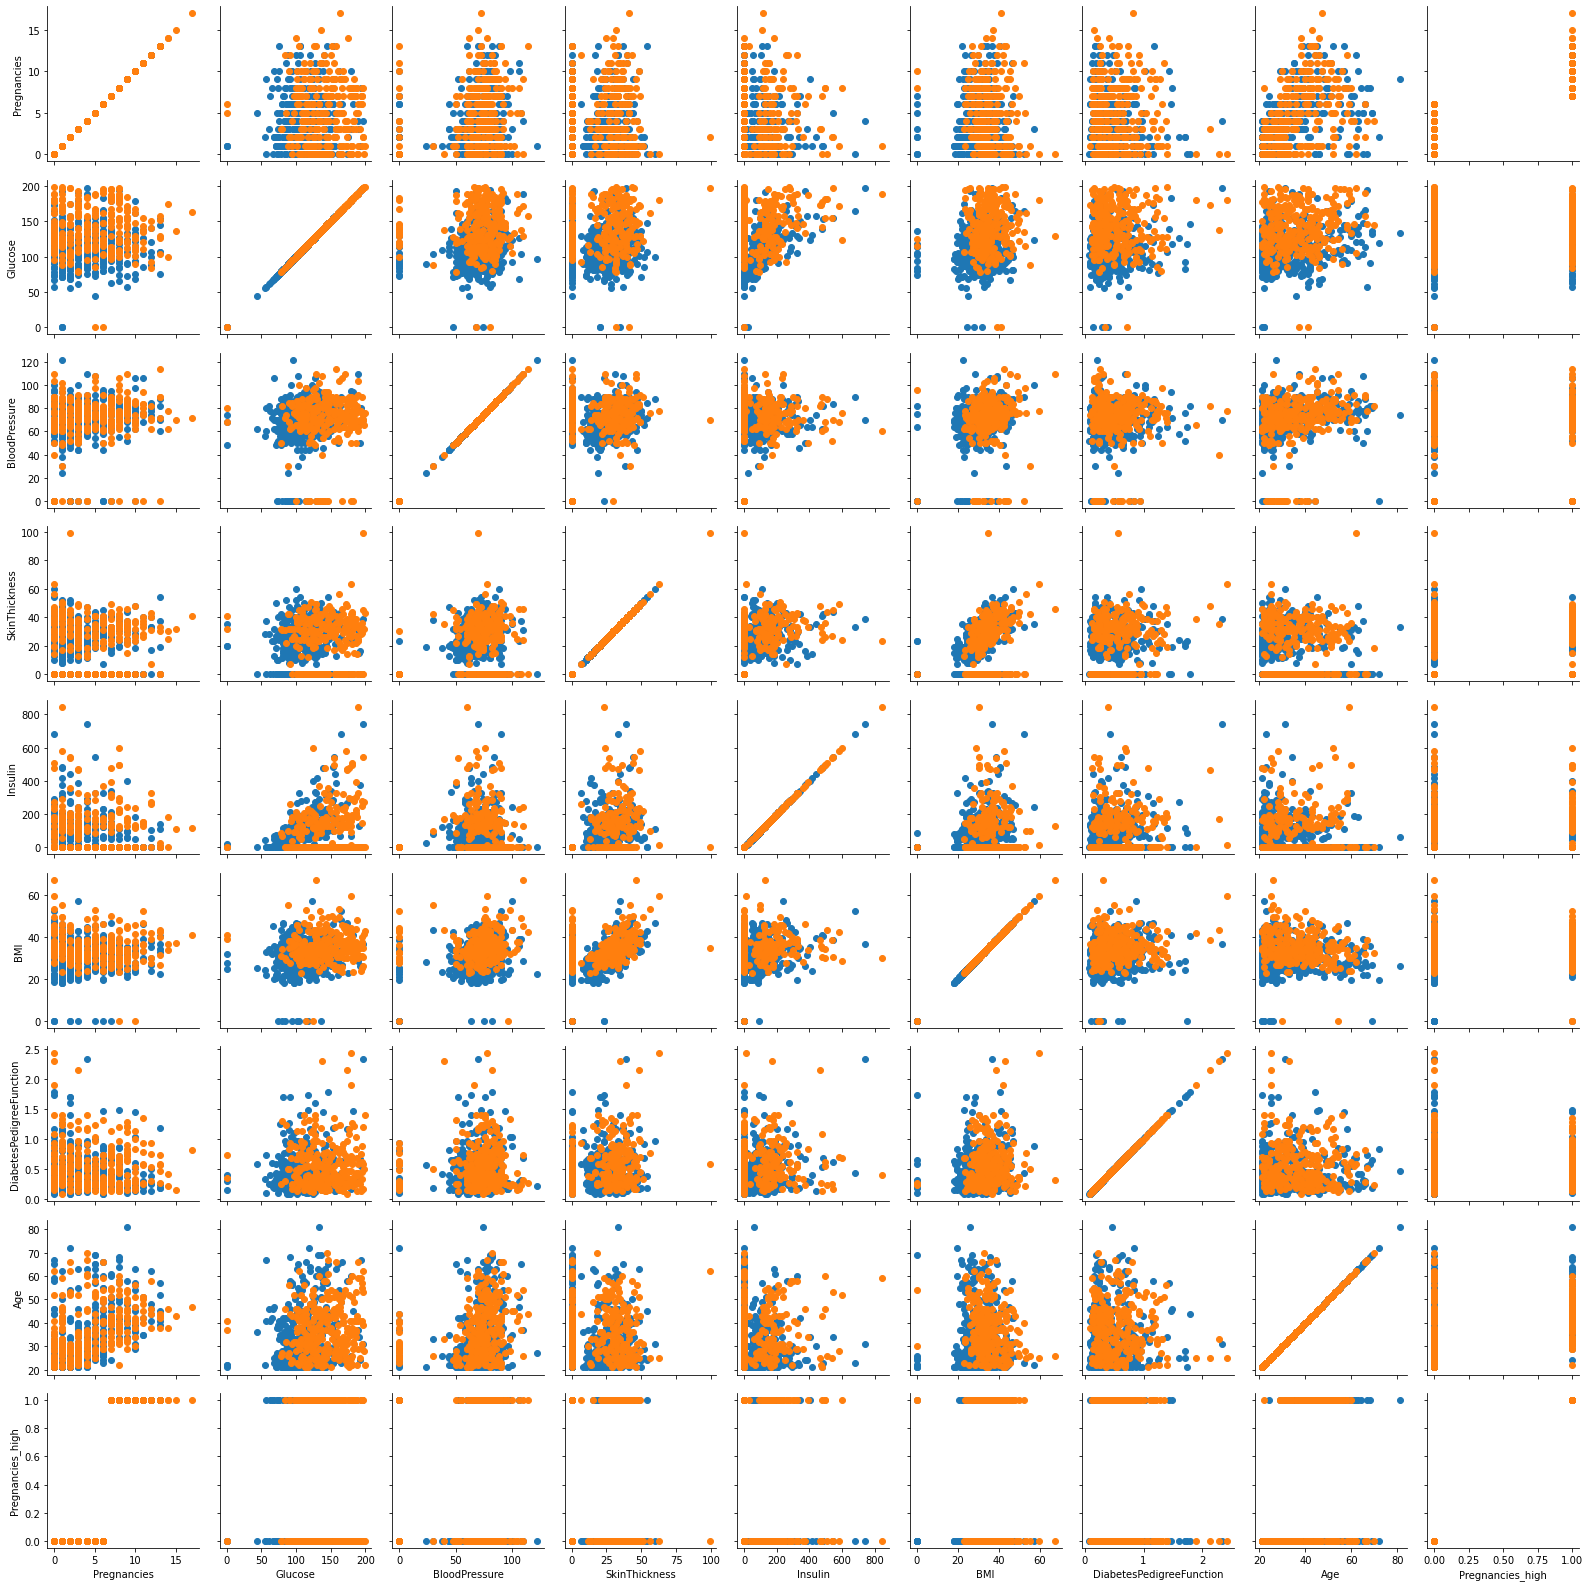

In [ ]:
g = sns.PairGrid(df, hue='Outcome')
# 어떤 그래프로 그릴지 설정한다
g.map(plt.scatter)

## 상관분석

In [ ]:
# pandas 에서는 상관분석을 제공한다

df_corr = df.corr()
df_corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898,0.821533
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581,0.151271
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068,0.122218
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752,-0.030295
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548,-0.031523
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695,0.039075
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844,0.016022
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356,0.468883
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000,0.237557
Pregnancies_high,0.821533,0.151271,0.122218,-0.030295,-0.031523,0.039075,0.016022,0.468883,0.237557,1.000000


In [ ]:
# corr()로 상관분석을 했지만 보기어렵다
# background_gradient()로 색상을 넣을 수 있다 

df_corr.style.background_gradient()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898,0.821533
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581,0.151271
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068,0.122218
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752,-0.030295
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548,-0.031523
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695,0.039075
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844,0.016022
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356,0.468883
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000,0.237557
Pregnancies_high,0.821533,0.151271,0.122218,-0.030295,-0.031523,0.039075,0.016022,0.468883,0.237557,1.000000


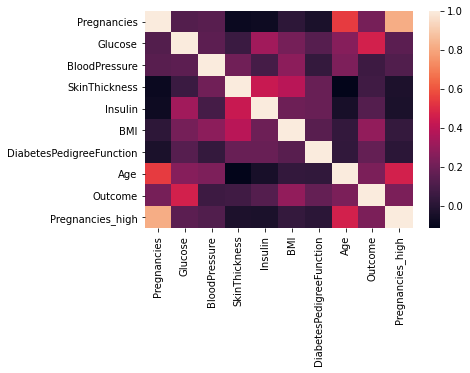

In [ ]:
# 위의 결과를 heatmap에 넣어본다

sns.heatmap(df_corr)

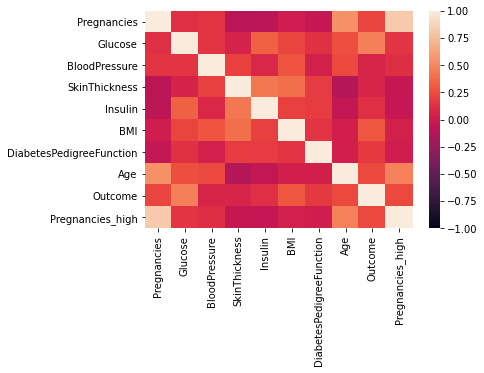

In [ ]:
sns.heatmap(df_corr , vmax=1, vmin=-1)

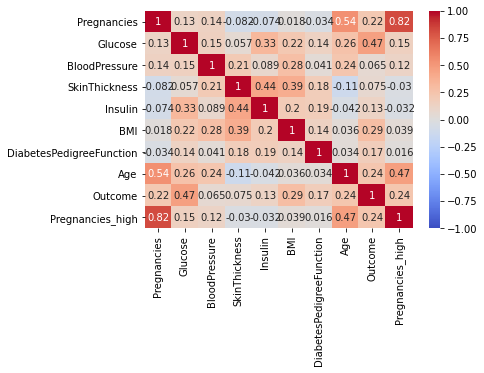

In [ ]:
sns.heatmap(df_corr , vmax=1, vmin=-1, cmap='coolwarm', annot=True)

결측 처리를 하고 상관관계를 구해보겠다

In [ ]:
df_metrics = df.iloc[:,1:-2].replace(0,np.nan)
df_metrics

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148.0,72.0,35.0,NaN,33.6,0.627,50
1,85.0,66.0,29.0,NaN,26.6,0.351,31
2,183.0,64.0,NaN,NaN,23.3,0.672,32
3,89.0,66.0,23.0,94.0,28.1,0.167,21
4,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9,0.171,63
764,122.0,70.0,27.0,NaN,36.8,0.340,27
765,121.0,72.0,23.0,112.0,26.2,0.245,30
766,126.0,60.0,NaN,NaN,30.1,0.349,47


In [ ]:
df_metrics['Pregnancies'] = df.Pregnancies
df_metrics['Outcome'] = df.Outcome
df_metrics

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
0,148.0,72.0,35.0,NaN,33.6,0.627,50,6,1
1,85.0,66.0,29.0,NaN,26.6,0.351,31,1,0
2,183.0,64.0,NaN,NaN,23.3,0.672,32,8,1
3,89.0,66.0,23.0,94.0,28.1,0.167,21,1,0
4,137.0,40.0,35.0,168.0,43.1,2.288,33,0,1
...,...,...,...,...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9,0.171,63,10,0
764,122.0,70.0,27.0,NaN,36.8,0.340,27,2,0
765,121.0,72.0,23.0,112.0,26.2,0.245,30,5,0
766,126.0,60.0,NaN,NaN,30.1,0.349,47,1,1


In [ ]:
df_metrics_corr=df_metrics.corr()
df_metrics_corr.style.background_gradient()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
Glucose,1.000000,0.223192,0.228043,0.581186,0.232771,0.137246,0.267136,0.128135,0.494650
BloodPressure,0.223192,1.000000,0.226839,0.098272,0.289230,-0.002805,0.330107,0.214178,0.170589
SkinThickness,0.228043,0.226839,1.000000,0.184888,0.648214,0.115016,0.166816,0.100239,0.259491
Insulin,0.581186,0.098272,0.184888,1.000000,0.228050,0.130395,0.220261,0.082171,0.303454
BMI,0.232771,0.289230,0.648214,0.228050,1.000000,0.155382,0.025841,0.021719,0.313680
DiabetesPedigreeFunction,0.137246,-0.002805,0.115016,0.130395,0.155382,1.000000,0.033561,-0.033523,0.173844
Age,0.267136,0.330107,0.166816,0.220261,0.025841,0.033561,1.000000,0.544341,0.238356
Pregnancies,0.128135,0.214178,0.100239,0.082171,0.021719,-0.033523,0.544341,1.000000,0.221898
Outcome,0.494650,0.170589,0.259491,0.303454,0.313680,0.173844,0.238356,0.221898,1.000000


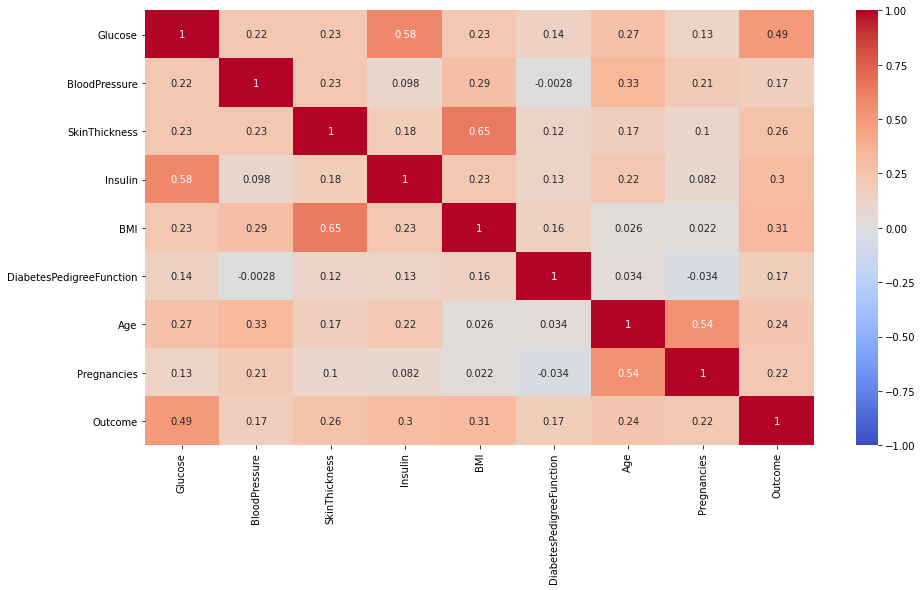

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(df_metrics_corr, annot=True, vmax=1, vmin=-1, cmap='coolwarm')


결측치 처리를 한 뒤 glucose와 Insulin의 상관관계가 높은 것을 확인 할 수 있다   

In [ ]:
df_metrics_corr["Outcome"]

Glucose                     0.494650
BloodPressure               0.170589
SkinThickness               0.259491
Insulin                     0.303454
BMI                         0.313680
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Pregnancies                 0.221898
Outcome                     1.000000
Name: Outcome, dtype: float64

상관관계가 높은 것들을 regplot으로 그려보겠다

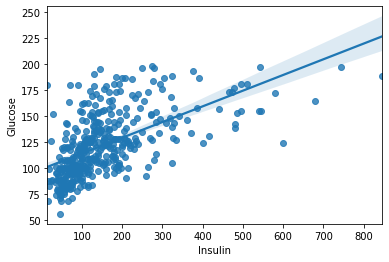

In [ ]:
# insulin과 glucose

sns.regplot(data=df_metrics, x='Insulin', y='Glucose')

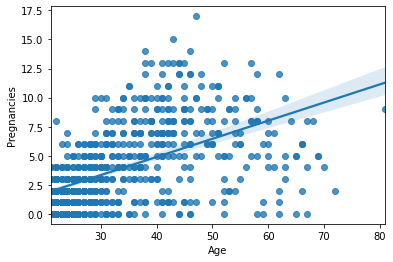

In [ ]:
#Age 와 Pregnancies

sns.regplot(data=df_metrics, x = "Age", y='Pregnancies')

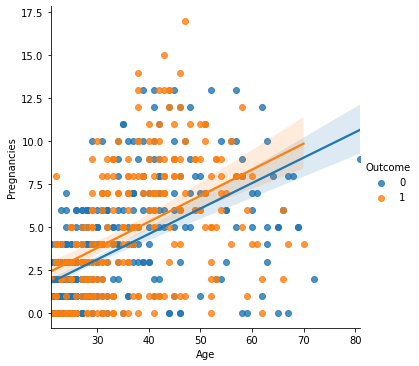

In [ ]:
# Age와 Pregnancies값을 Outcome에 따라 표현

sns.lmplot(data = df_metrics, x="Age", y='Pregnancies' , hue="Outcome")

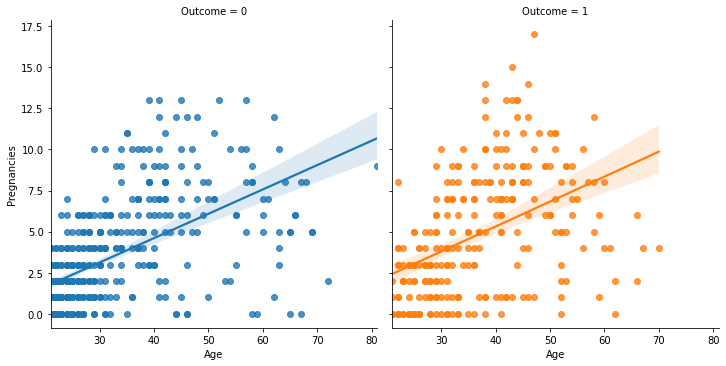

In [ ]:
# lmplot은 subplot도 그릴 수 있다
sns.lmplot(data = df_metrics, x="Age", y='Pregnancies' , hue='Outcome',col="Outcome")